In [334]:
from matplotlib import pyplot as plt
import pandas as pd
data = pd.read_csv('data.csv', usecols=['player_score', 'comp_score', 'computerHasAce', 'decision'])
nc = 0
for index, i in data.iterrows():
    newr = pd.Series(({'player_score': i.player_score, 'comp_score': i.comp_score, 'computerHasAce': i.computerHasAce, 
                       'decision': i.decision}))
    newr = pd.DataFrame([newr])
    if i['decision'] == 0:
        data = pd.concat([data,newr], ignore_index=True)
        nc +=1
        if nc >2000:
            break

#because there is a large number of values at 0 at bottom of set
data = data.sample(frac=1).reset_index(drop=True)
            
decision = data.decision.values
data = data.drop(['decision'], axis=1)
data

,player_score,comp_score,computerHasAce
0,12,19,0
1,20,9,0
2,19,18,1
3,19,17,0
4,12,20,0
...,...,...,...
10328,7,17,0
10329,17,14,0
10330,17,17,0
10331,20,18,1


Train on 9299 samples, validate on 1034 samples
Epoch 1/15
9299/9299 [==============================] - 5s 526us/step - loss: 0.8181 - acc: 0.5405 - val_loss: 0.7260 - val_acc: 0.5600
Epoch 2/15
9299/9299 [==============================] - 2s 169us/step - loss: 0.6479 - acc: 0.6187 - val_loss: 0.5469 - val_acc: 0.7485
Epoch 3/15
9299/9299 [==============================] - 1s 160us/step - loss: 0.5805 - acc: 0.6905 - val_loss: 0.5096 - val_acc: 0.7447
Epoch 4/15
9299/9299 [==============================] - 2s 168us/step - loss: 0.5584 - acc: 0.6945 - val_loss: 0.5138 - val_acc: 0.7340
Epoch 5/15
9299/9299 [==============================] - 2s 166us/step - loss: 0.5085 - acc: 0.7059 - val_loss: 0.4529 - val_acc: 0.7234
Epoch 6/15
9299/9299 [==============================] - 2s 167us/step - loss: 0.4885 - acc: 0.7038 - val_loss: 0.4764 - val_acc: 0.6625
Epoch 7/15
9299/9299 [==============================] - 2s 166us/step - loss: 0.4815 - acc: 0.7108 - val_loss: 0.4639 - val_acc: 0.7456


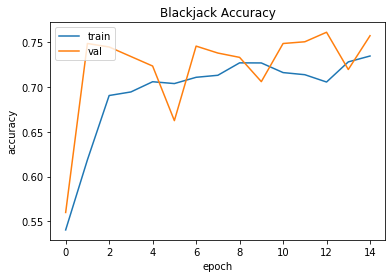

In [339]:
train_data = np.array(data)
train_label = np.array(decision)
#test_data = np.array(data[7000:])
#test_label = np.array(decision[7000:])
from keras import layers, models
network = models.Sequential()
network.add(layers.Dense(512, activation='tanh', input_shape=(3,)))
network.add(layers.Dense(512, activation='tanh'))
network.add(layers.Dense(512, activation='tanh'))
network.add(layers.Dense(512, activation='tanh'))
network.add(layers.Dense(512, activation='tanh'))
network.add(layers.Dense(1, activation='sigmoid'))

network.compile(optimizer='adam', 
               loss='binary_crossentropy',
               metrics=['accuracy'])

hist = network.fit(train_data, train_label, validation_split=.1, epochs=15, batch_size=128)

plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.title("Blackjack Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()
                 
#network.fit(train_data, train_label, epochs=15, batch_size=128)

In [336]:
count = 0
for i in train_label:
    if i == 0:
        count+=1
        
print(count/ len(train_label))

0.46772476531501017


In [337]:
new_data = pd.read_csv('newentry.csv', usecols=['player_score', 'comp_score', 'computerHasAce'])
new_decision = pd.read_csv('newentry.csv', usecols=['decision'])

new_data

,player_score,comp_score,computerHasAce
0,20,21,0
1,16,10,0
2,17,18,0
3,4,16,0


In [338]:
new_data = np.array(new_data)
new_decision = np.array(new_decision)

predict = network.predict_classes([new_data])
for i in predict:
    print(i)
    
    
for i in range(len(new_decision)):
    if new_decision[i] == predict[i]:
        print('Match')
    else:
        print('No Match')

[0]
[0]
[0]
[1]
Match
No Match
Match
No Match
